In [22]:
# Step 1: Load and Explore the Dataset

import pandas as pd

# Set your dataset path
file_path = r"C:\Users\Eileen Lok\6006CEM_ML_Portfolio\regression_task\train.csv"

# Load the dataset
data = pd.read_csv(file_path)

# Display basic information
print("Dataset Loaded Successfully!")
print("\nShape of the dataset:", data.shape)
print("\nColumns in dataset:\n", data.columns.tolist())
print("\nFirst 5 rows:")
display(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum().sort_values(ascending=False).head(10))

# Check data types
print("\nData Types:")
print(data.dtypes.head(10))


Dataset Loaded Successfully!

Shape of the dataset: (1460, 81)

Columns in dataset:
 ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeck

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Missing Values:
PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
dtype: int64

Data Types:
Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
dtype: object


In [24]:
# Step 2: Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Drop ID column
data = data.drop("Id", axis=1)

# 2. Separate features and target
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# 3. Handle missing values
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# Fill missing categorical values with 'None'
X[categorical_cols] = X[categorical_cols].fillna("None")

# Fill missing numeric values with median
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())

# 4. One-hot encode categorical columns
X = pd.get_dummies(X, drop_first=True)

# 5. Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scale numeric features
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("Preprocessing complete!")
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Preprocessing complete!
Training data shape: (1168, 260)
Testing data shape: (292, 260)


In [30]:
# Ensure all features are numeric and of type float32 for TensorFlow
import numpy as np

X_train = np.asarray(X_train, dtype=np.float32)
X_test = np.asarray(X_test, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.float32)

print("Data successfully converted to float32 for Neural Network training.")


Data successfully converted to float32 for Neural Network training.


In [34]:
# Step 3: Model Training and Evaluation
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

results = {}

# Linear Regression (Traditional ML)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

results["Linear Regression"] = {
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "MSE": mean_squared_error(y_test, y_pred_lr),
    "R2": r2_score(y_test, y_pred_lr)
}

# Feed-Forward Neural Network (Deep Learning)
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

dl_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the neural network
dl_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

y_pred_dl = dl_model.predict(X_test).flatten()

results["Neural Network"] = {
    "MAE": mean_absolute_error(y_test, y_pred_dl),
    "MSE": mean_squared_error(y_test, y_pred_dl),
    "R2": r2_score(y_test, y_pred_dl)
}

# XGBoost Regressor (Ensemble Model)
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

results["XGBoost Regressor"] = {
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "MSE": mean_squared_error(y_test, y_pred_xgb),
    "R2": r2_score(y_test, y_pred_xgb)
}

# Display results
import pandas as pd

results_df = pd.DataFrame(results).T
print("Model Training & Evaluation Complete!\n")
display(results_df)


C:\Users\Eileen Lok\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Model Training & Evaluation Complete!



,MAE,MSE,R2
Linear Regression,23929.429688,6.903720e+09,0.099944
Neural Network,24005.000000,1.767583e+09,0.769556
XGBoost Regressor,15519.943359,6.490001e+08,0.915388


In [39]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = XGBRegressor(random_state=42)

# Grid search (5-fold cross-validation)
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validated R²:", grid_search_xgb.best_score_)

# Evaluate tuned model
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("\nTuned XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb_tuned))
print("MSE:", mean_squared_error(y_test, y_pred_xgb_tuned))
print("R²:", r2_score(y_test, y_pred_xgb_tuned))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}
Best Cross-Validated R²: 0.8711340665817261

Tuned XGBoost Performance:
MAE: 15651.55859375
MSE: 619907136.0
R²: 0.9191811084747314


In [41]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam

best_mae = float('inf')
best_config = None

for lr in [0.001, 0.005]:
    for units in [64, 128]:
        for batch in [16, 32]:
            model = Sequential([
                Input(shape=(X_train.shape[1],)),
                Dense(units, activation='relu'),
                Dense(units // 2, activation='relu'),
                Dense(1)
            ])
            
            model.compile(optimizer=Adam(learning_rate=lr), loss='mae')
            model.fit(X_train, y_train, epochs=50, batch_size=batch, verbose=0)
            
            y_pred = model.predict(X_test).flatten()
            mae = mean_absolute_error(y_test, y_pred)
            
            if mae < best_mae:
                best_mae = mae
                best_config = (lr, units, batch)

print(f"Best NN Config → Learning Rate: {best_config[0]}, Units: {best_config[1]}, Batch: {best_config[2]}")
print(f"Best NN MAE: {best_mae}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Best NN Config → Learning Rate: 0.005, Units: 128, Batch: 16
Best NN MAE: 15922.97265625


                    Model       MAE           MSE      R²
0       Linear Regression  23929.43  6.900000e+09  0.0999
1  Neural Network (Tuned)  15922.97  1.810000e+09  0.7633
2         XGBoost (Tuned)  15651.56  6.200000e+08  0.9192


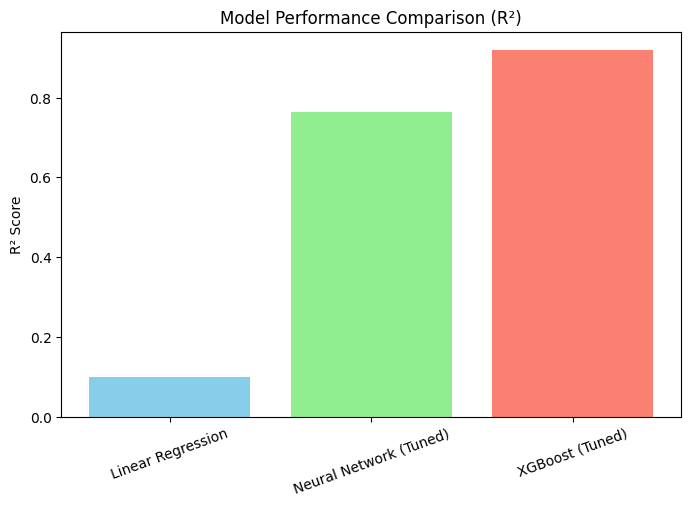

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Compare model performance
results = {
    "Model": ["Linear Regression", "Neural Network (Tuned)", "XGBoost (Tuned)"],
    "MAE": [23929.43, 15922.97, 15651.56],
    "MSE": [6.90e9, 1.81e9, 6.20e8],
    "R²": [0.0999, 0.7633, 0.9192]
}

df_results = pd.DataFrame(results)

print(df_results)

# Plot bar chart of R² for visual comparison
plt.figure(figsize=(8, 5))
plt.bar(df_results["Model"], df_results["R²"], color=["skyblue", "lightgreen", "salmon"])
plt.title("Model Performance Comparison (R²)")
plt.ylabel("R² Score")
plt.xticks(rotation=20)
plt.show()
